# Лабораторная работа №1
## Кабанец РТ5-51Б


### Основные характеристики датасета

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
sns.set_theme(style="ticks")

data = pd.read_csv('./data/Data_lab1.csv', sep=",")
data.head()

,State,City,Year,Month,Day,Store type,Price per kilogram
0,Aguascalientes,Aguascalientes,2023,1,2,Mom and Pop Store,21.33
1,Baja California,Mexicali,2023,1,2,Mom and Pop Store,29.14
2,Baja California,Tijuana,2023,1,2,Mom and Pop Store,25.82
3,Baja California Sur,La Paz,2023,1,2,Mom and Pop Store,25.00
4,Campeche,Campeche,2023,1,2,Mom and Pop Store,23.50


In [10]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 8046


In [15]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

State - 0
City - 0
Year - 0
Month - 0
Day - 0
Store type - 0
Price per kilogram - 71


In [16]:
# Основные статистические характеристки набора данных
data.describe()

,Year,Month,Day,Price per kilogram
count,8046.0,8046.000000,8046.000000,7975.000000
mean,2023.0,6.536913,15.798658,24.026860
std,0.0,3.430288,8.748299,3.354248
min,2023.0,1.000000,1.000000,15.000000
25%,2023.0,4.000000,8.000000,22.000000
50%,2023.0,7.000000,16.000000,24.000000
75%,2023.0,9.000000,23.000000,26.000000
max,2023.0,12.000000,31.000000,30.830000


In [17]:
# Определим уникальные значения для целевого признака
data['City'].unique()

array(['Aguascalientes', 'Mexicali', 'Tijuana', 'La\xa0Paz', 'Campeche',
       'Piedras\xa0Negras', 'Saltillo', 'Torreón', 'Colima', 'Tapachula',
       'Tuxtla\xa0Gutiérrez', 'Chihuahua', 'Cd.\xa0Juárez', 'D.F.',
       'ZM\xa0D.F.', 'Durango', 'Gómez\xa0Palacio', 'Celaya', 'León',
       'Acapulco', 'Chilpancingo', 'Pachuca', 'Guadalajara',
       'ZM\xa0Guadalajara', 'Toluca', 'Morelia', 'Cuernavaca', 'Tepic',
       'Monterrey', 'ZM\xa0Monterrey', 'Oaxaca', 'Puebla', 'ZM\xa0Puebla',
       'Querétaro', 'Cancún', 'Chetumal', 'San\xa0Luis\xa0Potosí',
       'Culiacán', 'Cd.\xa0Obregón', 'Hermosillo', 'Nogales',
       'San\xa0Luis\xa0Río\xa0Colorado', 'Villahermosa',
       'Cd.\xa0Victoria', 'Matamoros', 'Nuevo\xa0Laredo', 'Reynosa',
       'Tampico', 'Tlaxcala', 'Coatzacoalcos', 'Veracruz', 'Xalapa',
       'Mérida', 'Zacatecas'], dtype=object)

### Визуальное исследование датасета

Диаграмма рассеивания

<Axes: xlabel='Price per kilogram', ylabel='Month'>

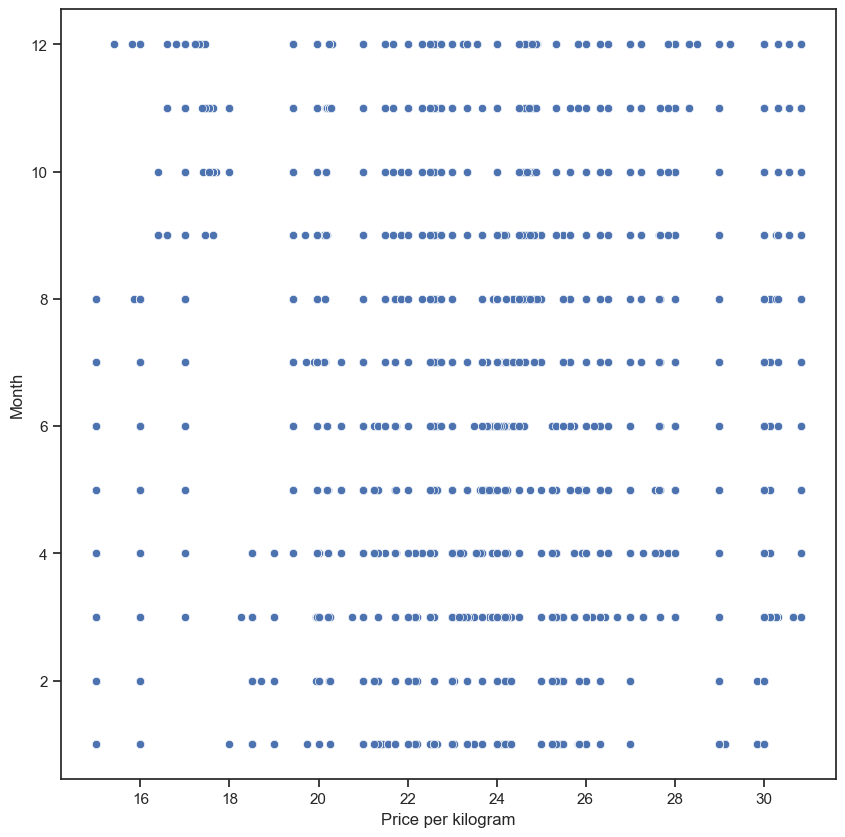

In [26]:
_, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Price per kilogram', y='Month', data=data)

<Axes: xlabel='Price per kilogram', ylabel='Month'>

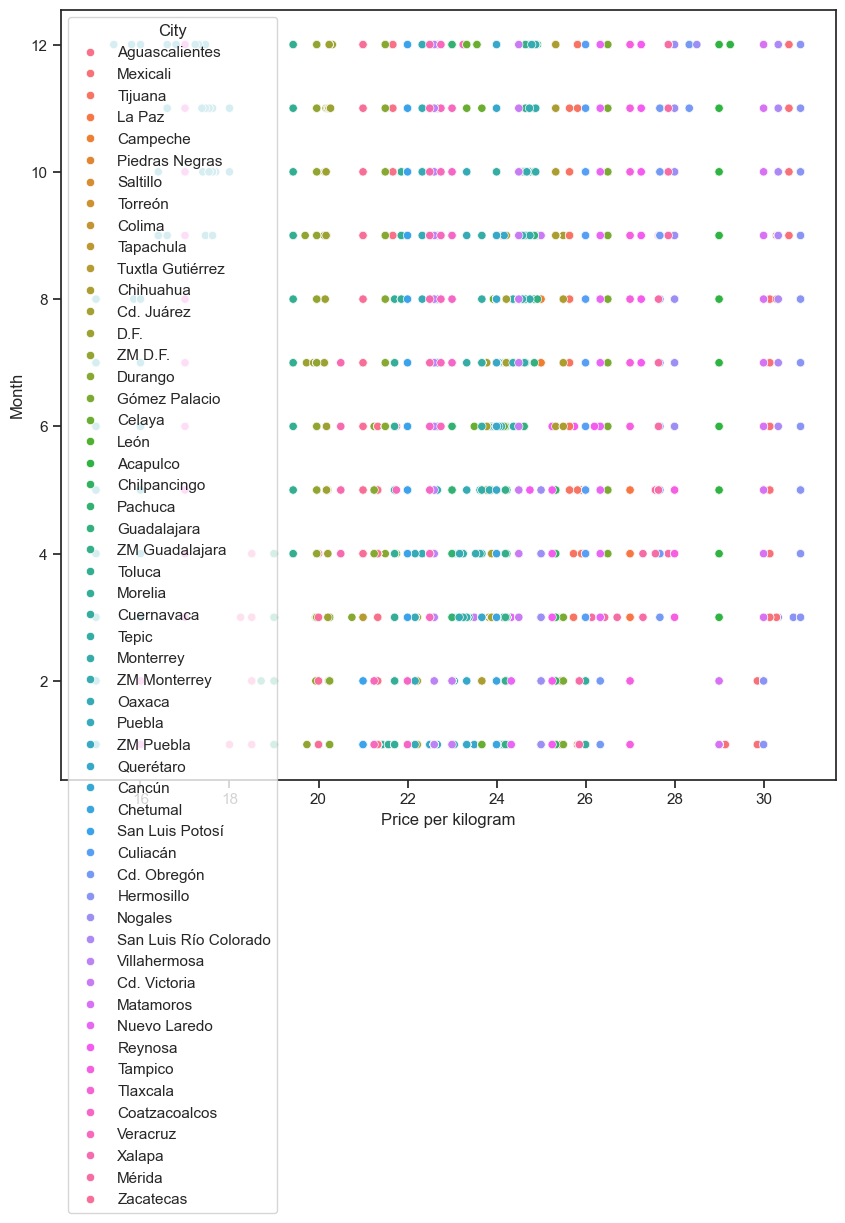

In [27]:
_, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Price per kilogram', y='Month', data=data, hue='City')

<Axes: xlabel='Price per kilogram', ylabel='Count'>

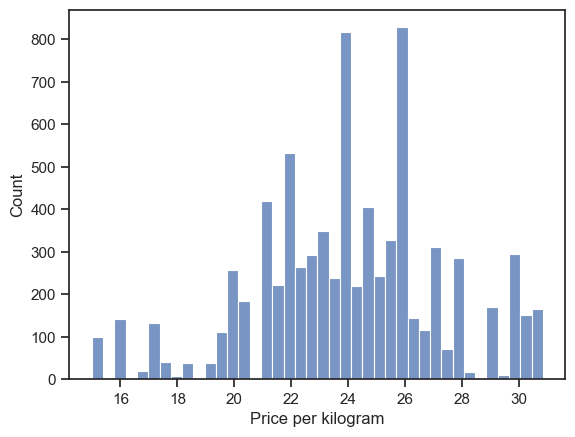

In [32]:
sns.histplot(data['Price per kilogram'])

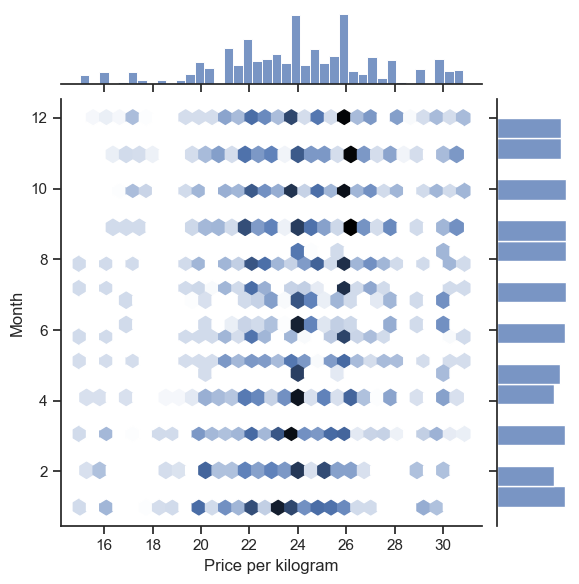

In [33]:
sns.jointplot(x='Price per kilogram', y='Month', data=data, kind='hex')

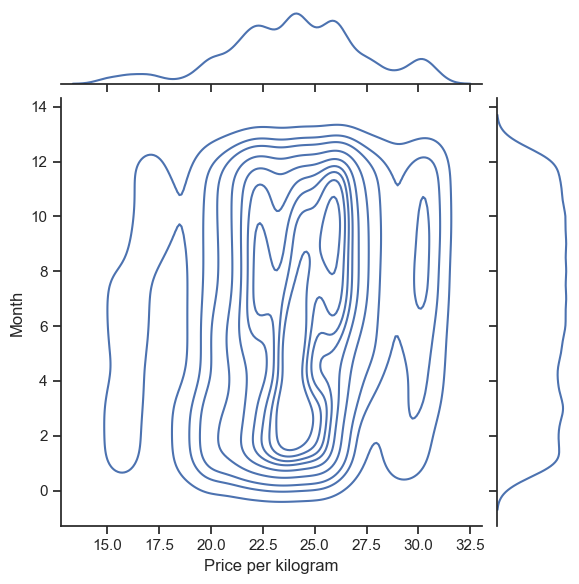

In [34]:
sns.jointplot(x='Price per kilogram', y='Month', data=data, kind="kde")

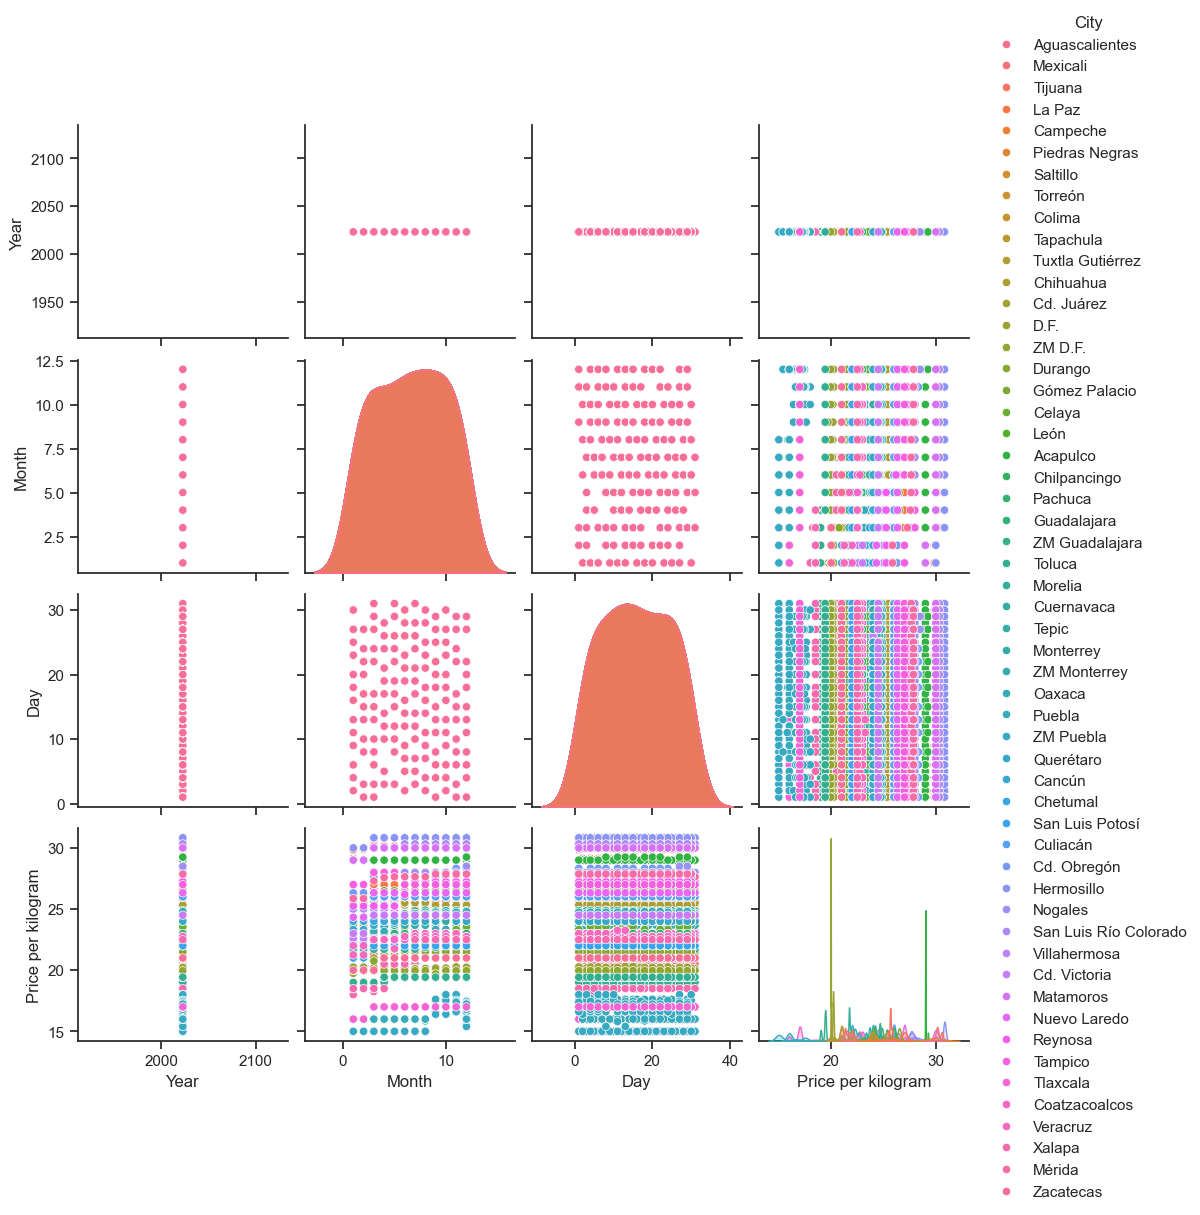

In [36]:
sns.pairplot(data, hue='City')

<Axes: ylabel='Price per kilogram'>

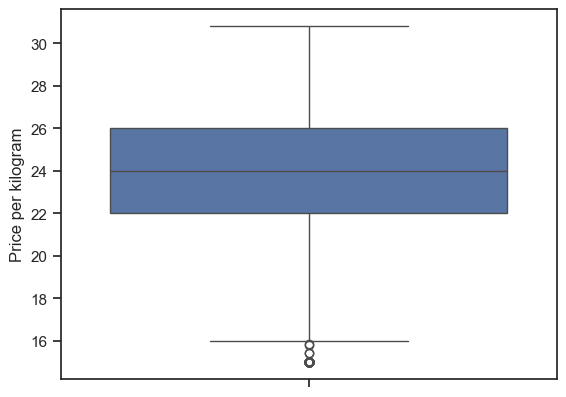

In [37]:
sns.boxplot(y=data['Price per kilogram'])

<Axes: xlabel='Month', ylabel='Price per kilogram'>

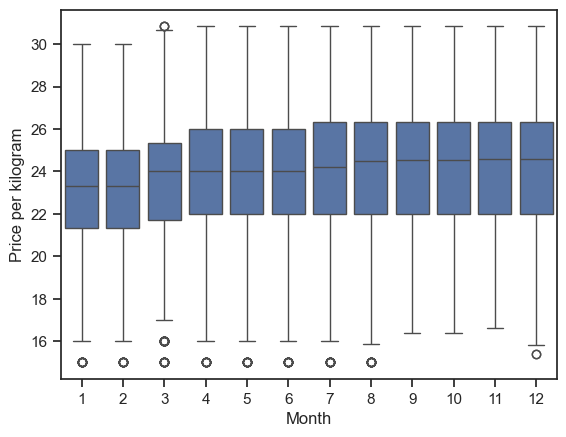

In [38]:
sns.boxplot(x='Month', y='Price per kilogram', data=data)

### Информация о корреляции признаков

In [39]:
data.corr(numeric_only=True, method='pearson')

,Year,Month,Day,Price per kilogram
Year,NaN,NaN,NaN,NaN
Month,NaN,1.000000,-0.033751,0.124290
Day,NaN,-0.033751,1.000000,0.009996
Price per kilogram,NaN,0.124290,0.009996,1.000000


In [41]:
data.corr(numeric_only=True, method='spearman')

,Year,Month,Day,Price per kilogram
Year,NaN,NaN,NaN,NaN
Month,NaN,1.000000,-0.034254,0.129060
Day,NaN,-0.034254,1.000000,0.011096
Price per kilogram,NaN,0.129060,0.011096,1.000000


<Axes: >

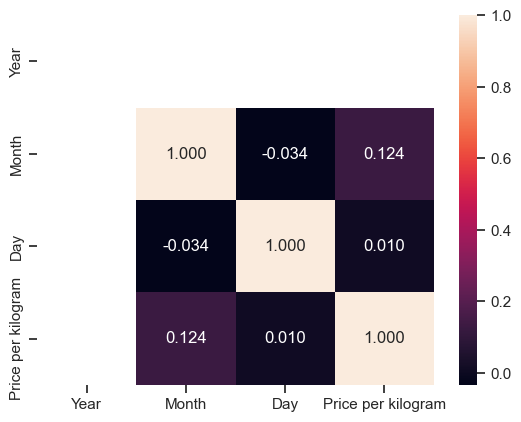

In [42]:
sns.heatmap(data.corr(numeric_only=True), annot=True, fmt='.3f')